In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt

from datetime import datetime
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                            #initial time starting of the runtime
#----------system parameters------------------------------
T=300.0                          #temparature in unit kelvin
eta=1e-3
a=2e-6                           #diameter of the probe sphere in meter

kb=1.38e-23                      #boltzman constant s.i unit
#Gp=2.2e-5                          #elastic modulus for both model Pa
#Gp=1000
#----------some constants determined from the above parameters
m=0.0                                     #mean of the random walk motion
#lamb=(etas/Gp)
#k=6*pi*(a/2)*Gp   

D = (kb*T)/(6*np.pi*eta*(a/2))

In [2]:
D

2.196338214668156e-13

In [14]:
A = D
alpha = -log(10)/1000
beta = 0

In [4]:
time = 0

time0=1200
time1=1800
time2=2400
time3=3000
time4=3600

In [5]:
A*exp(alpha*time0)

3.4809614847697565e-12

In [6]:
A*exp((alpha-beta)*time1)

1.3857957275073893e-11

In [7]:
A*exp((alpha-beta)*time2)

5.5169521604309175e-11

In [8]:
A*exp((alpha-beta)*time3)

2.1963382146681576e-10

In [9]:
A*exp((alpha-beta)*time4)

8.743779922200602e-10

In [15]:
#---------body of the code---------------------------
xv0=1e-4                                #initial x cordinate in unit micro meter
yv0=8e-4                                  #initial y cordinate in unit micro meter
xarr_v0=[]                                #list of total x after ith step
yarr_v0=[]                                #list of total y after 
t_arr0=[]
xstep0_arr=[]

In [16]:
#---------body of the code---------------------------
xv=xv0
yv=yv0
xarr_v=xarr_v0
yarr_v=yarr_v0
t_arr=t_arr0
xstep_arr=xstep0_arr
time=time0
#D=1e-12

In [17]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [18]:
'''tau_t=0
tf = time+60                                #total time in unit second
t = time
dt=0
while t < tf:
    #--------------------maxwell part of the code--------
    #p=uniform(-4,0)
    dt=1e-3                            #linear distributed in 10 base logscale of time


    tau_t =1 #exp((alpha-beta)*time)
    tau_tt = exp(beta*t)
    tau_t_arr.append(tau_t)
    
    #---------------------voigt part of the code--------
    Ax=xv*exp(-(dt/lamb*tau_t))
    Bx=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))
    Bx_arr.append(Bx)
    Ax_arr.append(Ax)
    
    
    Ay=yv*exp(-(dt/lamb*tau_t))
    By=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))
    
    xstep=(gauss(Ax,Bx))
    xv=xv+xstep
    xarr_v.append(xv)
    
    xstep_arr.append(xstep)
    
    ystep=(gauss(Ay,By))
    yv=yv+ystep
    yarr_v.append(yv)
    
    t=t+dt
    t_arr.append(t)'''

'tau_t=0\ntf = time+60                                #total time in unit second\nt = time\ndt=0\nwhile t < tf:\n    #--------------------maxwell part of the code--------\n    #p=uniform(-4,0)\n    dt=1e-3                            #linear distributed in 10 base logscale of time\n\n\n    tau_t =1 #exp((alpha-beta)*time)\n    tau_tt = exp(beta*t)\n    tau_t_arr.append(tau_t)\n    \n    #---------------------voigt part of the code--------\n    Ax=xv*exp(-(dt/lamb*tau_t))\n    Bx=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))\n    Bx_arr.append(Bx)\n    Ax_arr.append(Ax)\n    \n    \n    Ay=yv*exp(-(dt/lamb*tau_t))\n    By=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))\n    \n    xstep=(gauss(Ax,Bx))\n    xv=xv+xstep\n    xarr_v.append(xv)\n    \n    xstep_arr.append(xstep)\n    \n    ystep=(gauss(Ay,By))\n    yv=yv+ystep\n    yarr_v.append(yv)\n    \n    t=t+dt\n    t_arr.append(t)'

In [19]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0

while t<tf:
    #--------------------maxwell part of the code
    p= uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [20]:
#min(Ax_arr)

In [21]:
Bx_arr

[-7.282887687164566e-10,
 -1.2294971510163165e-10,
 1.1593316693063044e-10,
 6.136319784249869e-10,
 1.6376983762953855e-09,
 3.834872032708886e-11,
 -9.821337452471773e-10,
 1.5968713403386098e-09,
 1.7093496458338742e-09,
 4.6592125482038445e-11,
 3.033678585727191e-11,
 -1.7404016968678052e-10,
 -5.252930760655145e-09,
 -4.889160988774547e-10,
 9.481089296837421e-10,
 -2.9404131279510527e-10,
 6.46772078516741e-11,
 -1.1997572979527048e-09,
 -3.839139899307763e-09,
 2.964823116742091e-10,
 1.5131609318072029e-09,
 8.075921839810942e-10,
 -8.660462168998441e-09,
 -4.5429088565728987e-10,
 -1.3889720672802038e-10,
 -3.955072321990191e-11,
 -5.017154188782623e-09,
 1.7012156472438838e-10,
 1.1718592707154128e-08,
 2.544665537346009e-10,
 2.80832505533096e-09,
 -2.6291509300143034e-10,
 5.457101858135775e-10,
 6.766620990657837e-11,
 -1.8288195064026833e-09,
 -3.772474293233096e-10,
 1.0355078118182404e-10,
 -1.2852123245155495e-10,
 5.272816738418557e-10,
 -2.2498600599146906e-08,
 -9.

In [22]:
max(Bx_arr)

5.1813335772853554e-08

In [23]:
min(Bx_arr)

-6.928632587890376e-08

In [24]:
#min(tau_t_arr)

In [25]:
#max(tau_t_arr)

In [26]:
xstep0_arr = Bx_arr

In [27]:
xstep0_arr=np.array(xstep0_arr)

In [28]:
xarr_v0=xarr_v
yarr_v0=yarr_v
t_arr0=t_arr

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

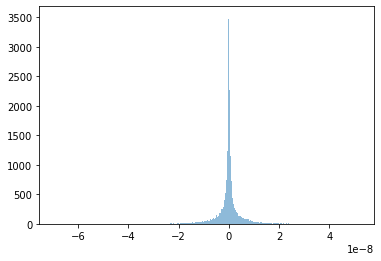

In [29]:
plt.hist(xstep0_arr, bins=1000, alpha=0.5)

In [30]:
#---------body of the code---------------------------
xv1=30e-5                                #initial x cordinate in unit micro meter
yv1=-10e-5                                  #initial y cordinate in unit micro meter
xarr_v1=[]                                #list of total x after ith step
yarr_v1=[]                                #list of total y after 
t_arr1=[]
xstep1_arr=[]

In [31]:
#---------body of the code---------------------------
xv=xv1
yv=yv1
xarr_v=xarr_v1
yarr_v=yarr_v1
t_arr=t_arr1
xstep_arr=xstep1_arr
time=time1
#D=5e-11

In [32]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [33]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [34]:
xstep1_arr = Bx_arr

In [35]:
xstep1_arr=np.array(xstep1_arr)

In [36]:
xarr_v1=xarr_v
yarr_v1=yarr_v
t_arr1=t_arr

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

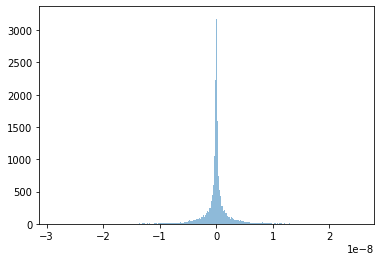

In [37]:
plt.hist(xstep1_arr, bins=1000, alpha=0.5)

In [38]:
#---------body of the code---------------------------
xv2=40e-5                                   #initial x cordinate in unit micro meter
yv2=80e-5                                #initial y cordinate in unit micro meter
xarr_v2=[]                                #list of total x after ith step
yarr_v2=[]                                #list of total y after 
t_arr2=[]
xstep2_arr=[]



In [39]:
#---------body of the code---------------------------
xv=xv2
yv=yv2
xarr_v=xarr_v2
yarr_v=yarr_v2
t_arr=t_arr2
xstep_arr=xstep2_arr
time=time2
#D=1e-11

In [40]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [41]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [42]:
xstep2_arr = Bx_arr

In [43]:
xarr_v2=xarr_v
yarr_v2=yarr_v
t_arr2=t_arr

In [44]:
xstep2_arr=np.array(xstep2_arr)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

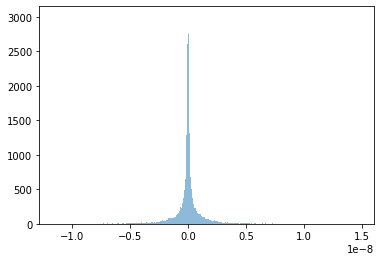

In [45]:
plt.hist(xstep2_arr, bins=1000, alpha=0.5)

In [46]:
#--------body of the code---------------------------
xv3=10e-5                                   #initial x cordinate in unit micro meter
yv3=-20e-5                                 #initial y cordinate in unit micro meter
xarr_v3=[]                                #list of total x after ith step
yarr_v3=[]                                #list of total y after 
t_arr3=[]
xstep3_arr=[]

In [47]:
#---------body of the code---------------------------
xv=xv3
yv=yv3
xarr_v=xarr_v3
yarr_v=yarr_v3
t_arr=t_arr3
xstep_arr=xstep3_arr
time=time3
#D=5e-10

In [48]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [49]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [50]:
xstep3_arr = Bx_arr

In [51]:
xarr_v3=xarr_v
yarr_v3=yarr_v
t_arr3=t_arr

In [52]:
xstep3_arr=np.array(xstep3_arr)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

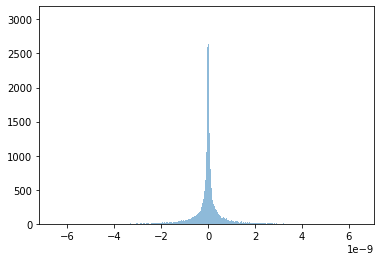

In [53]:
plt.hist(xstep3_arr, bins=1000, alpha=0.5)

In [54]:
#--------body of the code---------------------------
xv4=50e-5                                   #initial x cordinate in unit micro meter
yv4=20e-5                                 #initial y cordinate in unit micro meter
xarr_v4=[]                                #list of total x after ith step
yarr_v4=[]                                #list of total y after 
t_arr4=[]
xstep4_arr=[]

In [55]:
#---------body of the code---------------------------
xv=xv4
yv=yv4
xarr_v=xarr_v4
yarr_v=yarr_v4
t_arr=t_arr4
xstep_arr=xstep4_arr
time=time4
#D=1e-9

In [56]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [57]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [58]:
xarr_v4=xarr_v
yarr_v4=yarr_v
t_arr4=t_arr

In [59]:
xstep4_arr = Bx_arr

In [60]:
xstep4_arr=np.array(xstep4_arr)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

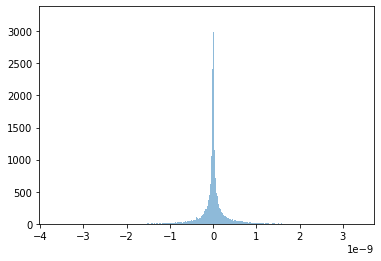

In [61]:
plt.hist(xstep4_arr, bins=1000, alpha=0.5)

In [62]:
#from scipy import stats as ss

In [63]:
'''import matplotlib.mlab as mlab

arr=xstep0_arr

plt.hist(arr, density=True,bins=1000, alpha=0.5)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, ss.norm.pdf(x, mean, sigma))

plt.show()

'''

'import matplotlib.mlab as mlab\n\narr=xstep0_arr\n\nplt.hist(arr, density=True,bins=1000, alpha=0.5)\nplt.xlim((min(arr), max(arr)))\n\nmean = np.mean(arr)\nvariance = np.var(arr)\nsigma = np.sqrt(variance)\nx = np.linspace(min(arr), max(arr), 100)\nplt.plot(x, ss.norm.pdf(x, mean, sigma))\n\nplt.show()\n\n'

In [64]:
xarr_v0=np.array(xarr_v0)
yarr_v0=np.array(yarr_v0)

In [65]:
xarr_v1=np.array(xarr_v1)
yarr_v1=np.array(yarr_v1)

In [66]:
xarr_v2=np.array(xarr_v2)
yarr_v2=np.array(yarr_v2)

In [67]:
xarr_v3=np.array(xarr_v3)
yarr_v3=np.array(yarr_v3)

In [68]:
xarr_v4=np.array(xarr_v4)
yarr_v4=np.array(yarr_v4)

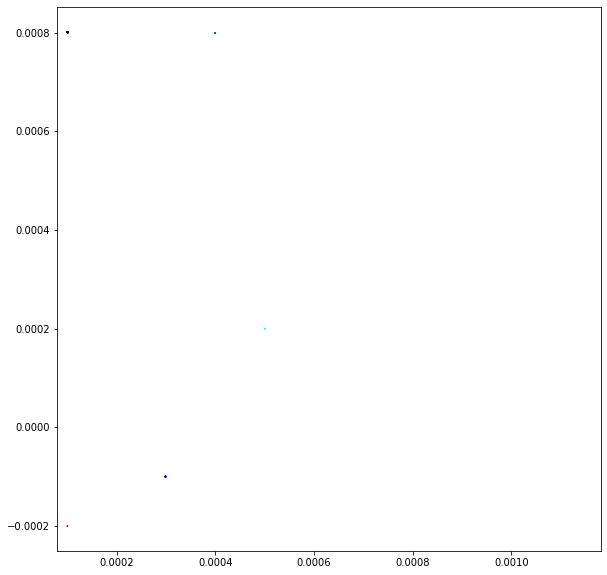

In [69]:
from pylab import rcParams
rcParams ['figure.figsize']=10,10
plt.plot(xarr_v0,yarr_v0,'black')
plt.plot(xarr_v1,yarr_v1,'blue')
plt.plot(xarr_v2,yarr_v2,'green')
plt.plot(xarr_v3,yarr_v3,'red')
plt.plot(xarr_v4,yarr_v4,'cyan')

#plt.plot(xarr_v2[0],yarr_v2[0], 'ro')
#plt.plot(xarr_v3[0],yarr_v3[0], 'yo')

#plt.ylabel(r'$\mu m$', size=20)
#plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')
plt.show()

In [65]:
'''from pylab import rcParams
rcParams ['figure.figsize']=6,6
#plt.plot(xarr_v1,yarr_v1,'blue')
plt.plot(xarr_v2,yarr_v2,'green')
plt.plot(xarr_v1[0],yarr_v1[0], 'ro')
plt.plot(xarr_v1[-1],yarr_v1[-1], 'yo')

#plt.ylabel(r'$\mu m$', size=20)
#plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')
plt.show()'''

"from pylab import rcParams\nrcParams ['figure.figsize']=6,6\n#plt.plot(xarr_v1,yarr_v1,'blue')\nplt.plot(xarr_v2,yarr_v2,'green')\nplt.plot(xarr_v1[0],yarr_v1[0], 'ro')\nplt.plot(xarr_v1[-1],yarr_v1[-1], 'yo')\n\n#plt.ylabel(r'$\\mu m$', size=20)\n#plt.xlabel(r'$\\mu m$', size=20)\nplt.axis('square')\nplt.show()"

In [70]:
np.savetxt('910.txt',xarr_v0)
np.savetxt('911.txt',yarr_v0)
np.savetxt('912.txt',t_arr0)

In [71]:
np.savetxt('1010.txt',xarr_v1)
np.savetxt('1020.txt',yarr_v1)
np.savetxt('1030.txt',t_arr1)

In [72]:
np.savetxt('1040.txt',xarr_v2)
np.savetxt('1050.txt',yarr_v2)
np.savetxt('1060.txt',t_arr2)

In [73]:
np.savetxt('1070.txt',xarr_v3)
np.savetxt('1080.txt',yarr_v3)
np.savetxt('1090.txt',t_arr3)

In [74]:
np.savetxt('1100.txt',xarr_v4)
np.savetxt('1110.txt',yarr_v4)
np.savetxt('1120.txt',t_arr4)

In [75]:
len(xarr_v)

54377

In [72]:
#from scipy.stats import t

In [73]:
#t(10,0)

In [74]:
'''# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 2, 3, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

'''

'# Define the distribution parameters to be plotted\nmu = 0\nk_values = [1E10, 2, 3, 0.5]\nlinestyles = [\'-\', \'--\', \':\', \'-.\']\nx = np.linspace(-10, 10, 1000)\n\n#------------------------------------------------------------\n# plot the distributions\nfig, ax = plt.subplots(figsize=(5, 3.75))\n\nfor k, ls in zip(k_values, linestyles):\n    dist = t(k, 0)\n\n    if k >= 1E10:\n        label = r\'$\\mathrm{t}(k=\\infty)$\'\n    else:\n        label = r\'$\\mathrm{t}(k=%.1f)$\' % k\n\n    plt.plot(x, dist.pdf(x), ls=ls, c=\'black\', label=label)\n\nplt.xlim(-5, 5)\nplt.ylim(0.0, 0.45)\n\nplt.xlabel(\'$x$\')\nplt.ylabel(r\'$p(x|k)$\')\nplt.title("Student\'s $t$ Distribution")\n\nplt.legend()\nplt.show()\n\n'

In [75]:
'''np.random.standard_t(df=1e6)'''

'np.random.standard_t(df=1e6)'

In [76]:
'''gauss(0,10000)'''

'gauss(0,10000)'